# 안녕하세요^^ 
## AIVLE 2차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정 1번 파일입니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## [프로젝트 흐름]

0. 튜토리얼에서 주민등록 데이터를 함께 전처리/체험 해 봅니다.

    ### 1. 서울시 버스 정류장 데이터를 전처리/분석 합니다.
2. 서울시 유동인구 데이터를 전처리/분석 합니다.
3. 서울시 주민등록 데이터를 전처리/분석 합니다.
4. 서울시 업종등록 데이터를 전처리/분석 합니다.
5. 위 4개 데이터를 합쳐서 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "버스 정류장 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'rawdata' 폴더에 있습니다.

[기본 데이터]
* 1.1 BUS_STATION_BOARDING_MONTH_20230301.csv

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]

* 1.1 서울시 버스정류소 위치정보.csv

* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do


---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 BUS_STATION_BOARDING_MONTH_202301.csv'파일을 'bus' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [1]:
import sys
import numpy as np
import pandas as pd

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

bus = pd.read_csv('rawdata/1.1 BUS_STATION_BOARDING_MONTH_202301.csv', sep=",", encoding = "cp949")

In [3]:
# 데이터 프레임의 Shape을 확인합니다.

bus.shape

(1242090, 9)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'bus' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
bus.head()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20230101,100,100번(하계동~용산구청),100000002,01002,창경궁.서울대학교병원(00031),33,47,20230104
1,20230101,9401,9401번(구미동~서울역),206000321,47024,샛별마을.우방아파트(00015),76,1,20230104
2,20230101,9401,9401번(구미동~서울역),206000320,47022,중앙공원.샛별마을.라이프아파트(00016),55,8,20230104
3,20230101,9401,9401번(구미동~서울역),206000319,47054,효자촌(00017),363,21,20230104
4,20230101,9401,9401번(구미동~서울역),206000318,47065,서현중학교(00018),133,25,20230104


In [5]:
bus.tail()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1242085,20230131,은평02,은평02(상신초교.두산.한신아파트~불광역),111900141,12828,역촌유치원입구(00011),56,6,20230203
1242086,20230131,6516,6516번(양천차고지~박미고개),114000293,15412,계남초등학교(00007),29,9,20230203
1242087,20230131,5511,5511번(신림2동차고지~중앙대학교),120000028,21127,서울대학교(00005),39,8,20230203
1242088,20230131,505,505번(노온사동~서울역),213000107,38221,소하2동행정복지센터.광명동굴길입구(00088),52,248,20230203
1242089,20230131,6516,6516번(양천차고지~박미고개),114000395,15718,양천공영차고지(00001),33,0,20230203


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242090 entries, 0 to 1242089
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1242090 non-null  int64 
 1   노선번호        1242090 non-null  object
 2   노선명         1242090 non-null  object
 3   표준버스정류장ID   1242090 non-null  int64 
 4   버스정류장ARS번호  1242090 non-null  object
 5   역명          1242090 non-null  object
 6   승차총승객수      1242090 non-null  int64 
 7   하차총승객수      1242090 non-null  int64 
 8   등록일자        1242090 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 85.3+ MB


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus.describe()


,사용일자,표준버스정류장ID,승차총승객수,하차총승객수,등록일자
count,1.242090e+06,1.242090e+06,1.242090e+06,1.242090e+06,1.242090e+06
mean,2.023012e+07,1.254219e+08,9.824638e+01,9.616134e+01,2.023013e+07
std,8.943980e+00,6.338575e+07,1.458214e+02,1.326740e+02,2.614456e+01
min,2.023010e+07,1.000000e+08,0.000000e+00,0.000000e+00,2.023010e+07
25%,2.023011e+07,1.079004e+08,1.200000e+01,1.500000e+01,2.023011e+07
50%,2.023012e+07,1.140002e+08,5.200000e+01,5.600000e+01,2.023012e+07
75%,2.023012e+07,1.210001e+08,1.290000e+02,1.280000e+02,2.023013e+07
max,2.023013e+07,9.998000e+08,4.414000e+03,4.022000e+03,2.023020e+07


#### [실습문제3] 위 데이터에서 버스정류장 위치를 구 별로 구분 하고 싶습니다.

* 'bus' 데이터의 정보를 확인해보세요.

* 어떻게 해야 할까요?? (tip! 버스정류장ARS번호의 앞 두자리가 구를 의미합니다.)

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록해주세요.


In [8]:
bus["버스정류장ARS번호"]

0          01002
1          47024
2          47022
3          47054
4          47065
           ...  
1242085    12828
1242086    15412
1242087    21127
1242088    38221
1242089    15718
Name: 버스정류장ARS번호, Length: 1242090, dtype: object

In [11]:
# 버스정류장 ARS 번호의 앞자리 2개로 새로 컬럼 생성합니다

bus['자치구'] = bus["버스정류장ARS번호"].str.slice(0,2)
bus['자치구']

0          01
1          47
2          47
3          47
4          47
           ..
1242085    12
1242086    15
1242087    21
1242088    38
1242089    15
Name: 자치구, Length: 1242090, dtype: object

* 버스정류장 ARS 번호 - 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [12]:
# 구 코드를 구 이름으로 변환합니다

bus['자치구'] = bus['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})


In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus.head()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20230101,100,100번(하계동~용산구청),100000002,01002,창경궁.서울대학교병원(00031),33,47,20230104,종로구
1,20230101,9401,9401번(구미동~서울역),206000321,47024,샛별마을.우방아파트(00015),76,1,20230104,NaN
2,20230101,9401,9401번(구미동~서울역),206000320,47022,중앙공원.샛별마을.라이프아파트(00016),55,8,20230104,NaN
3,20230101,9401,9401번(구미동~서울역),206000319,47054,효자촌(00017),363,21,20230104,NaN
4,20230101,9401,9401번(구미동~서울역),206000318,47065,서현중학교(00018),133,25,20230104,NaN


#### [실습문제4] 결측치를 처리 합시다 



In [14]:
# (가상기점),(가상종점)때문에 ARS번호가 '~'로 나오는 곳이 있습니다 확인해볼까요?

bus.loc[bus['버스정류장ARS번호'] == '~']

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
103,20230101,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00078),0,2,20230104,NaN
573,20230101,9701,9701번(가좌동~서울역),999800005,~,가좌동종점(종점가상)(00127),0,3,20230104,NaN
1604,20230101,7021,7021번(은평공영차고지~롯데백화점),999033574,~,은평공영차고지(가상)(00077),0,11,20230104,NaN
1681,20230101,7017,7017번(은평공영차고지~롯데백화점),999033574,~,은평공영차고지(가상)(00090),0,7,20230104,NaN
1771,20230101,7016,7016번(은평차고지~상명대),999033574,~,은평공영차고지(가상)(00107),0,8,20230104,NaN
...,...,...,...,...,...,...,...,...,...,...
1241434,20230131,6211,6211번(신월동~상왕십리),990076458,~,중부운수앞(가상)(00112),0,89,20230203,NaN
1241544,20230131,472,472번(개포동~신촌),998501974,~,개포동차고지(종점가상)(00073),0,43,20230203,NaN
1241616,20230131,506,506번(신림동~종로1가),998501979,~,신림2동차고지(종점가상)(00102),0,1,20230203,NaN
1241744,20230131,1122,1122번(상진운수차고지~원자력병원),998501930,~,상진운수종점(기점가상)(00001),28,0,20230203,NaN


In [15]:
# NaN 값을 제거 하겠습니다

bus = bus.dropna()

In [16]:
bus = bus.astype({"버스정류장ARS번호":'int'})

In [17]:
# ARS번호가 '~' 인 정류장을 빼고도 가상종점, 가상기점이 남아있습니다. 확인해볼까요?

bus[bus['역명'].str.contains('가상')]

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
27,20230101,9401,9401번(구미동~서울역),102000308,23850,한남대교(가상)(00028),0,17,20230104,강남구
81,20230101,9711,9711번(일산동부경찰서~양재역),119000299,20963,한강대교남단(가상)(00055),0,1,20230104,동작구
82,20230101,9711,9711번(일산동부경찰서~양재역),113000483,14998,서강대교북단(가상)(00023),0,1,20230104,마포구
102,20230101,9711,9711번(일산동부경찰서~양재역),102000307,23849,한남대교(가상)(00029),0,2,20230104,강남구
1772,20230101,7016,7016번(은평차고지~상명대),113000505,14096,홍대입구역(가상)(00020),0,100,20230104,마포구
...,...,...,...,...,...,...,...,...,...,...
1239626,20230131,2222,2222번(자양동~고대앞),104000304,5499,건대입구(가상)(00008),3,80,20230203,광진구
1239815,20230131,720,720번(기자촌~답십리),111001130,12900,구파발(가상)(00108),0,180,20230203,은평구
1239872,20230131,603,603번(신월동~시청),113000508,14098,합정역(가상)(00028),0,95,20230203,마포구
1239879,20230131,602,602번(양천공용차고지~시청앞),113000505,14096,홍대입구역(가상)(00034),0,130,20230203,마포구


In [18]:
#정류장 이름에 '가상' 단어가 들어간 정류장을 제거하겠습니다.

virtual_index = bus[bus['역명'].str.contains('가상')].index
bus = bus.drop(virtual_index)

#### [실습문제5] 구별로 버스정류장이 몇 개 있는지 궁금합니다

* 구별로 버스 정류장의 개수를 확인해 주세요


In [20]:
# nunique로 고유값의 갯수만 확인해볼게요

bus_count = bus.groupby("자치구")["버스정류장ARS번호"].nunique()
bus_count

자치구
강남구     503
강동구     368
강북구     412
강서구     566
관악구     467
광진구     277
구로구     482
금천구     348
노원구     515
도봉구     366
동대문구    307
동작구     441
마포구     560
서대문구    458
서초구     599
성동구     430
성북구     601
송파구     450
양천구     323
영등포구    467
용산구     323
은평구     499
종로구     349
중구      172
중랑구     424
Name: 버스정류장ARS번호, dtype: int64

- 이 데이터는 서울이 아닌 경기도 정류장도 포함하고 있습니다.
- 서울의 버스 정류장 데이터만 포함하고 있는 '1.1 서울시 버스정류장 위치정보' 파일을 활용해 보겠습니다.

In [21]:
# 서울의 버스 정류장 데이터만 포함하고 있는 csv 파일 입니다 (서울 공공데이터 포탈)
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do
only_seoul = pd.read_csv('rawdata/1.1 서울시 버스정류소 위치정보.csv', sep=",", encoding = "cp949")

In [22]:
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11315 entries, 0 to 11314
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   정류소번호   11315 non-null  int64  
 1   정류소명    11315 non-null  object 
 2   X좌표     11315 non-null  float64
 3   Y좌표     11315 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 353.7+ KB


In [23]:
#컬럼명을 동일하게 맞춰봅니다.
only_seoul.rename(columns={'정류소번호':'버스정류장ARS번호'}, inplace=True)

In [24]:
# 서울시의 버스 정류장만 보기 위해 두개의 데이터 프레임을 합쳐봅니다.
df = pd.merge(only_seoul, bus ,how='inner', on='버스정류장ARS번호')

In [25]:
df.head()

,버스정류장ARS번호,정류소명,X좌표,Y좌표,사용일자,노선번호,노선명,표준버스정류장ID,역명,승차총승객수,하차총승객수,등록일자,자치구
0,3007,삼각지역,126.974012,37.53527,20230101,507,507번(석수역~동대문문화공원),102000007,삼각지역(00044),31,83,20230104,용산구
1,3007,삼각지역,126.974012,37.53527,20230101,N15,N15번(우이동성원아파트~남태령역),102000007,삼각지역(00104),0,2,20230104,용산구
2,3007,삼각지역,126.974012,37.53527,20230101,500,500번(석수역~을지로입구),102000007,삼각지역(00037),24,116,20230104,용산구
3,3007,삼각지역,126.974012,37.53527,20230101,504,504번(광명공영차고지~남대문),102000007,삼각지역(00041),47,149,20230104,용산구
4,3007,삼각지역,126.974012,37.53527,20230101,750B,750B번(은평차고지~서울대),102000007,삼각지역(00056),24,102,20230104,용산구


In [26]:
# 필요없는 컬럼을 지웁니다.
df = df.drop(['X좌표', 'Y좌표', '정류소명'], axis=1)

In [27]:
# 구 별로 버스 정류장의 개수를 확인해 주세요

seoul_bus_station_ARS = df.groupby(by=["자치구"], as_index=False)["버스정류장ARS번호"].nunique()
seoul_bus_station_ARS

,자치구,버스정류장ARS번호
0,강남구,496
1,강동구,360
2,강북구,412
3,강서구,566
4,관악구,465
5,광진구,270
6,구로구,481
7,금천구,346
8,노원구,514
9,도봉구,358


#### [실습문제6] 구 별로 버스 노선이 몇 개나 지나가는지 궁금합니다.

* 구별로 버스 노선의 개수를 확인해 주세요

In [28]:
seoul_bus_station_line = df.groupby(by=["자치구"], as_index=False)["노선번호"].nunique()
seoul_bus_station_line

,자치구,노선번호
0,강남구,95
1,강동구,22
2,강북구,67
3,강서구,48
4,관악구,81
5,광진구,43
6,구로구,78
7,금천구,57
8,노원구,58
9,도봉구,47


#### [실습문제7] 각 구별로 승차 총 승객수, 하차 총 승객수를 알아봅시다

* groupby 를 활용해 봅시다.

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_sum = df.groupby(by=["자치구"], as_index=False)["승차총승객수","하차총승객수"].sum()
seoul_bus_station_sum


C:\Users\82107\AppData\Local\Temp\ipykernel_9952\3130414315.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_sum = df.groupby(by=["자치구"], as_index=False)["승차총승객수","하차총승객수"].sum()


,자치구,승차총승객수,하차총승객수
0,강남구,7605690,7218161
1,강동구,2769288,2702980
2,강북구,4619962,4476588
3,강서구,4599504,4573299
4,관악구,6780412,6924027
5,광진구,2672110,2654306
6,구로구,4846677,4647336
7,금천구,3724507,3540551
8,노원구,3973240,3922938
9,도봉구,3152870,3057690


#### [실습문제8] 각 구별로 승차 평균 승객수, 하차 평균 승객수를 알아봅시다

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_mean = df.groupby(by=["자치구"], as_index=False)["승차총승객수","하차총승객수"].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'}, inplace=True)
seoul_bus_station_mean

C:\Users\82107\AppData\Local\Temp\ipykernel_9952\564739230.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_mean = df.groupby(by=["자치구"], as_index=False)["승차총승객수","하차총승객수"].mean()


,자치구,승차평균승객수,하차평균승객수
0,강남구,114.536624,108.700696
1,강동구,86.337896,84.270616
2,강북구,123.005458,119.188157
3,강서구,83.868276,83.390449
4,관악구,130.903566,133.676217
5,광진구,105.746567,105.041988
6,구로구,113.271875,108.613069
7,금천구,119.298751,113.406502
8,노원구,77.294374,76.315812
9,도봉구,98.687555,95.708339


#### [실습문제9] 데이터 프레임을 합쳐보겠습니다. 

In [31]:
# 네 개 파일을 합쳐볼까요

# seoul_bus_station_ARS - 구 별 버스 정류장 개수
# seoul_bus_station_line - 구 별 버스 노선 개수
# seoul_bus_station_sum - 구 별 총 승/하차 승객수
# seoul_bus_station_mean - 구 별 평균 승/하차 승객수

a = pd.merge(seoul_bus_station_ARS,seoul_bus_station_line,how='inner', on='자치구')
b = pd.merge(a,seoul_bus_station_sum,how='inner', on='자치구')
seoul_bus_station = pd.merge(b,seoul_bus_station_mean,how='inner', on='자치구')

In [32]:
# column 이름을 바꿔주겠습니다.
seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수','노선번호':'노선수'}, inplace=True)

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,496,95,7605690,7218161,114.536624,108.700696
1,강동구,360,22,2769288,2702980,86.337896,84.270616
2,강북구,412,67,4619962,4476588,123.005458,119.188157
3,강서구,566,48,4599504,4573299,83.868276,83.390449
4,관악구,465,81,6780412,6924027,130.903566,133.676217


In [34]:
# 해당 데이터프레임을 'df_seoul_bus_station.csv' 파일로 저장하세요.
seoul_bus_station.to_csv("df_seoul_bus_station.csv", index = False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 데이터를 분석하고 인사이트를 도출해보세요.

In [38]:
import seaborn as sns

In [43]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [44]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,496,95,7605690,7218161,114.536624,108.700696
1,강동구,360,22,2769288,2702980,86.337896,84.270616
2,강북구,412,67,4619962,4476588,123.005458,119.188157
3,강서구,566,48,4599504,4573299,83.868276,83.390449
4,관악구,465,81,6780412,6924027,130.903566,133.676217


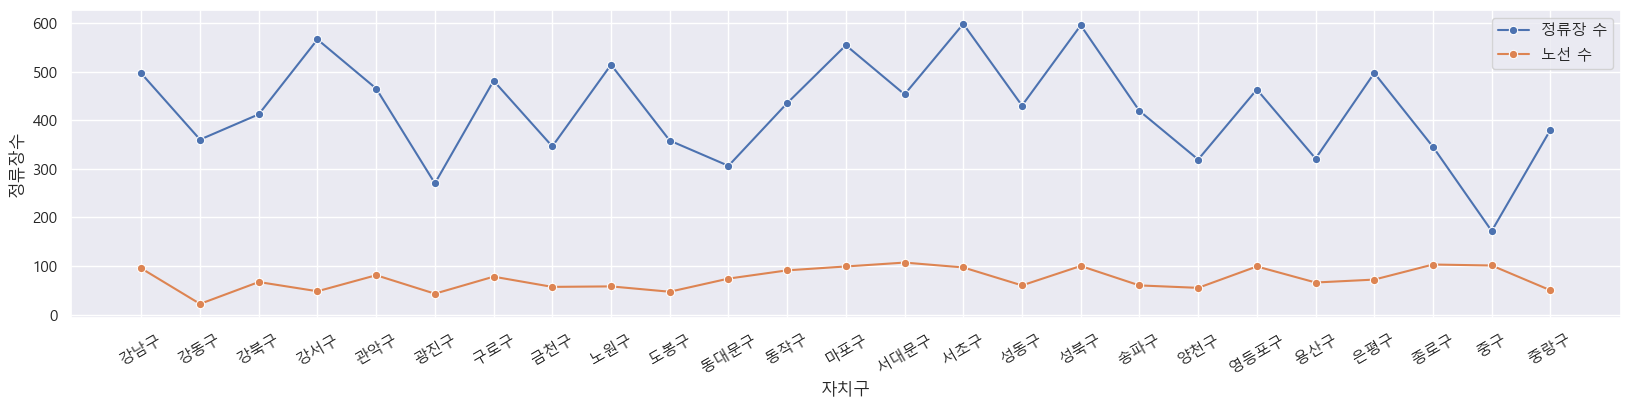

In [79]:
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(x = '자치구', y = '정류장수', marker = 'o', label ='정류장 수' ,data = seoul_bus_station)
sns.lineplot(x = '자치구', y = '노선수', marker = 'o',label ='노선 수' ,data = seoul_bus_station)
plt.legend()

<AxesSubplot:xlabel='자치구', ylabel='노선별 정류장수'>

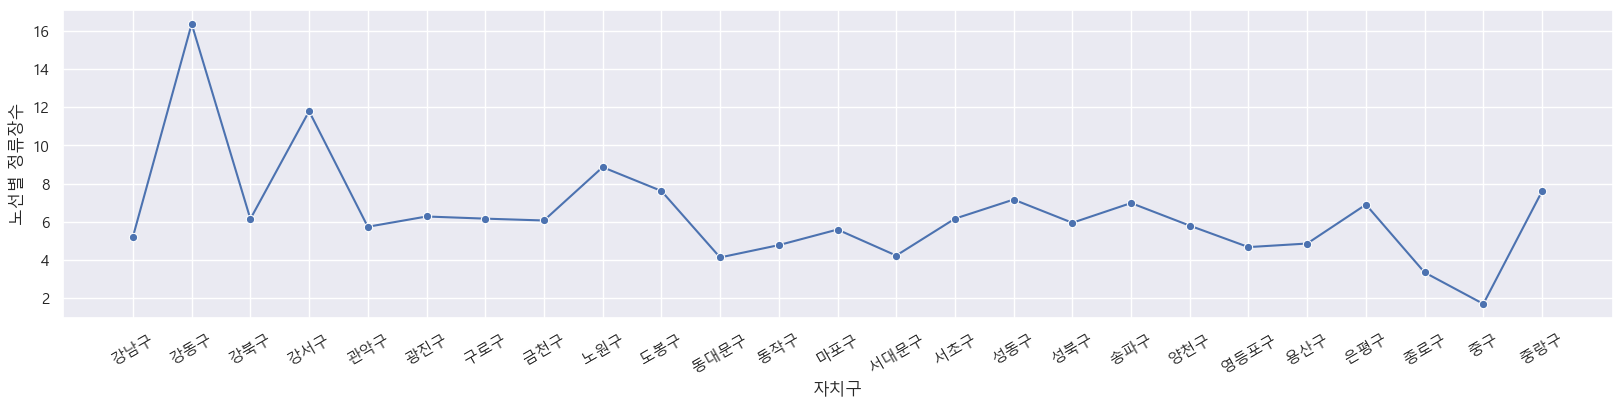

In [73]:
seoul_bus_station['노선별 정류장수'] = seoul_bus_station['정류장수'] / seoul_bus_station['노선수']
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(x = '자치구', y = '노선별 정류장수', marker = 'o',data = seoul_bus_station)

<AxesSubplot:xlabel='자치구', ylabel='승하차차이'>

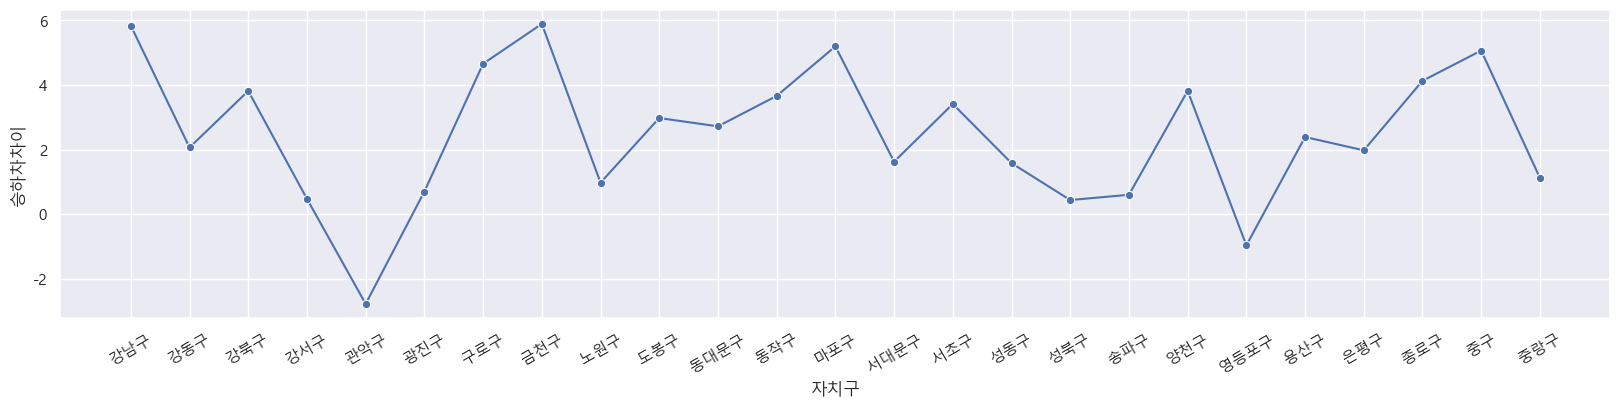

In [70]:
seoul_bus_station['승하차차이'] = seoul_bus_station['승차평균승객수'] - seoul_bus_station['하차평균승객수']

plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(x = '자치구', y = '승하차차이', marker = 'o',data = seoul_bus_station)

In [46]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.

# 1. 서초구와 성북구의 정류장 수가 많은 것을 확인 할 수 있으며, 중구에 가장 적은 것을 확인할 수 있다.
# 2. 서대문구의 노선수가 가장 많으며 강동구가 가장 적은 것을 확인 할 수 있다.
# 이를 봤을 때, 정류장 1개당 지나가는 노선 수는 강동구가 가장 많으며, 중구가 가장 적은 것을 확인 할 수 있다.

# 3. 승하차의 차이를 확인해 본 결과 관악구, 영등포구에선 하차의 인원이 평균적으로 많았던 것을 확인할 수 있고, 강남구와 금천구에 많은 것을 확인할 수 있다.
# 금천구에 공업단지가 많으며, 강남구에도 회사가 많은 것을 알 수 있고, 관악구, 영등포구에는 주거지가 많은 가능성이 있다고 생각된다.

---